In [2]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# get the data

In [3]:
housing = pd.read_csv(r"E:\04_projects\notebook\handson-ml-master - nb\datasets\housing\housing.csv")

# exploring the data

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259BB9B6F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000259BDFF0B70>]], dtype=object)

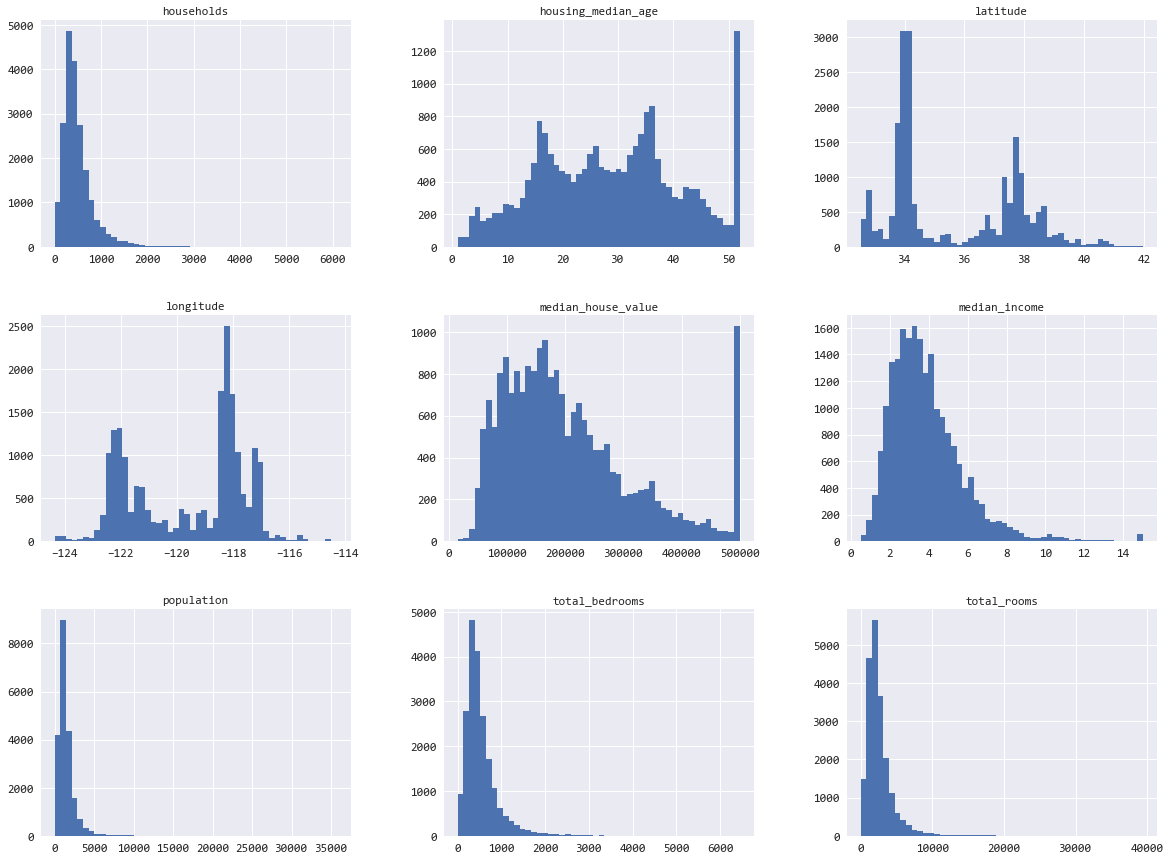

In [13]:
housing.hist(bins=50, figsize=(20,15))

In [15]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# create test data

In [26]:
# 我们认为median_income比较重要 所以想根据此变量进行分层抽样 确保测试集和训练集具有一致的比例 但是该变量是数值变量 所以需要进行合适的分组
housing['median_income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['median_income_cat'].where(housing['median_income_cat'] < 5, 5, inplace=True)  # where的用法 条件满足时返回原值 否则返回第二个参数 默认为np.nan
housing['median_income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: median_income_cat, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['median_income_cat'])
# 这里确定随机数种子 可以防止在debug时每次随机抽 从而逐渐用到了全部数据 这样可以保证测试集的独立性

In [30]:
train_set['median_income_cat'].value_counts() / len(train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: median_income_cat, dtype: float64

In [31]:
test_set['median_income_cat'].value_counts() / len(test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: median_income_cat, dtype: float64